# Week 2

## Lecture 3: Probability and Hashing

** Stochastic Processes **

An ongoing process where the next state might depend on _both the previous states and some random element._

### 1. Frequentist Probability

#### What's the probability (simulated) of rolling a dice and 5 consecutive ones?

In [2]:
import random

def rollDie():
    return random.choice([1,2,3,4,5,6])

def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    return result

In [4]:
print rollN(10)

4664154415


In [6]:
type(rollN(10)) # the outcome of the rollN Simulation is a string 

str

In [12]:
def getTarget(goal):
    numTries = 0
    numRolls = len(goal)
    while True:
        numTries += 1
        result = rollN(numRolls)
        if result == goal:
            return numTries

def runSim(goal, numTrials): # run sim call getTarget multiple times
    total = 0
    for i in range(numTrials):
        total += getTarget(goal)
    Average_Num_Tries =  total/float(numTrials)
    print 'Probability =', 1.0/Average_Num_Tries

In [13]:
runSim('11111', 100)

Probability = 0.000147901864155


In [19]:
def atLeastOneOne(numRolls, numTrials):
    numSuccess = 0
    for i in range(numTrials):
        rolls = rollN(numRolls)
        if '1' in rolls:
            numSuccess += 1
        fracSuccess = numSuccess/float(numTrials)
    print fracSuccess

In [22]:
atLeastOneOne(10, 1000)

0.859


#### What's the probability (simulated) of rolling a dice and no ones?

In [17]:
(5.0/6)**5

0.401877572016461

** IF you have 100 students in your class today and you promised to give 100 dollar to whomever that is having his/her birthday today. What is the probability of you not paying the money?**

In [18]:
(364.0/365)**100

0.7600670738159009

### 2. Hashing

In [1]:
import random

In [2]:
def strToInt(s):
    number = ''
    for c in s:
        number = number + str(ord(c))
    index = int(number)
    return index

In [3]:
print 'Index =', strToInt('a')

Index = 97


In [4]:
print 'Index =', strToInt('John is a cool dude')

Index = 74111104110321051153297329911111110832100117100101


In [6]:
def hashStr(s, tableSize = 101):
    number = ''
    for c in s:
        number = number + str(ord(c))
    index = int(number)%tableSize
    return index

In [7]:
print hashStr('a')
print hashStr('John is a cool dude')

97
66


In [8]:
print hashStr('Eric', 7)
print hashStr('Chris', 7)
print hashStr('Sarina', 7)

2
3
5


### How do you solve a collision problem? 

Initializing each element of the hash table to be an empty list, which is called a hash bucket. 

But you will run into the trade-off between time and space:

Large table, fewer collision, quicker look up. 

Small table, more collision, slower look up. 

### But what is the likelihood of collision?  --  Class Index Example

In [10]:
import random


class intDict(object):
    """A dictionary with integer keys"""
    
    def __init__(self, numBuckets):
        """Create an empty dictionary"""
        self.buckets = []
        self.numBuckets = numBuckets
        for i in range(numBuckets):
            self.buckets.append([])
            
    def addEntry(self, dictKey, dictVal):
        """Assumes dictKey an int.  Adds an entry."""
        hashBucket = self.buckets[dictKey%self.numBuckets]
        for i in range(len(hashBucket)):
            if hashBucket[i][0] == dictKey:
                hashBucket[i] = (dictKey, dictVal)
                return
        hashBucket.append((dictKey, dictVal))
        
    def getValue(self, dictKey):
        """Assumes dictKey an int.  Returns entry associated
           with the key dictKey"""
        hashBucket = self.buckets[dictKey%self.numBuckets]
        for e in hashBucket:
            if e[0] == dictKey:
                return e[1]
        return None
    
    def __str__(self):
        res = ''   # Change 1
        for b in self.buckets:
            for t in b:
                res = res + str(t[0]) + ':' + str(t[1]) + ','
        return '{' + res[:-1] + '}' # Change 2

### Use the int dict 

In [11]:
D = intDict(29)
for i in range(20):
    #choose a random int in range(10**5)
    key = random.choice(range(10**5))
    D.addEntry(key, i)

In [12]:
print '\n', 'The buckets are:'
for hashBucket in D.buckets: #violates abstraction barrier
    print '  ', hashBucket


The buckets are:
   []
   []
   []
   [(56611, 17)]
   [(91789, 3)]
   []
   [(61428, 8)]
   [(92633, 15)]
   []
   []
   []
   [(9494, 1)]
   [(26170, 18)]
   [(46268, 12)]
   []
   [(96759, 4), (25941, 7)]
   [(69529, 5), (80694, 13), (52593, 19)]
   [(12777, 10)]
   [(47955, 6)]
   []
   [(72317, 16)]
   [(77132, 9)]
   [(41811, 11)]
   []
   []
   [(3389, 0), (92187, 14)]
   []
   []
   [(90392, 2)]


****

## Lecture 4: Stochastic Programming and Statistical Thinking

### 1. LAW OF LARGE NUMBERS

In [1]:
import random

In [2]:
import pylab

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
# flip coin function

#set line width
pylab.rcParams['lines.linewidth'] = 6
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.major.size'] = 5
#set size of numbers on y-axis
pylab.rcParams['ytick.major.size'] = 5

In [4]:
def flip(numFlips):
    heads = 0
    for i in range(numFlips):
        if random.random() < 0.5:
            heads += 1
    return heads/float(numFlips)

In [5]:
def flipPlot(minExp, maxExp):
    """Assumes minExp and maxExp positive integers; minExp < maxExp
       Plots results of 2**minExp to 2**maxExp coin flips"""
    ratios = []
    diffs = []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.random() < 0.5:
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads/float(numTails))
        diffs.append(abs(numHeads - numTails))
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs)
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Heads/Tails')
    pylab.plot(xAxis, ratios)

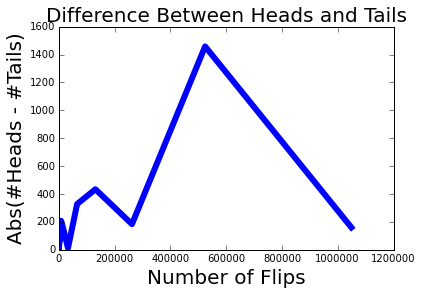

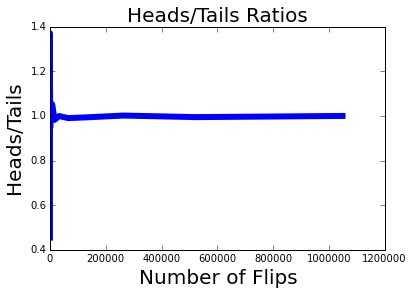

In [7]:
random.seed(0)
flipPlot(4, 20)
pylab.show()

Plot 1 has only isolated points, not a trend! Plot 2 has a linear scaling. 

In [8]:
# improvement on the original plots


def flipPlot(minExp, maxExp):
    """Assumes minExp and maxExp positive integers; minExp < maxExp
       Plots results of 2**minExp to 2**maxExp coin flips"""
    ratios = []
    diffs = []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.random() < 0.5:
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads/float(numTails))
        diffs.append(abs(numHeads - numTails))
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs)
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Heads/Tails')
    pylab.plot(xAxis, ratios)
    #Additional code to produce different plots from the
    #same data
    pylab.figure()
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs, 'bo')
    pylab.semilogx()
    pylab.semilogy()
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Heads/Tails')
    pylab.plot(xAxis, ratios, 'bo')
    pylab.semilogx()

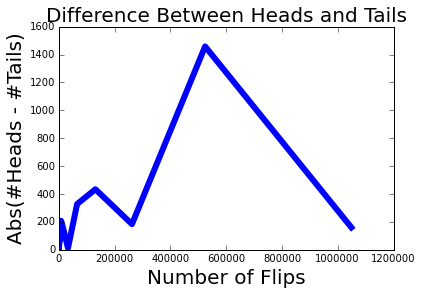

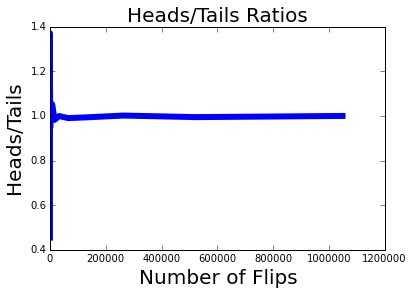

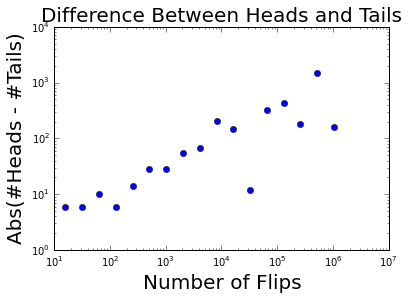

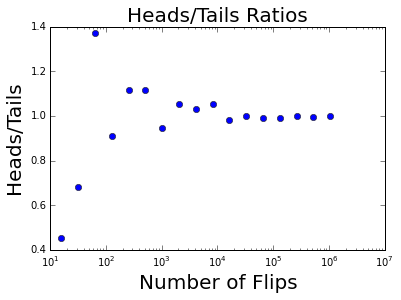

In [9]:
random.seed(0)
flipPlot(4, 20)
pylab.show()

 ### Observations:
 
It's never possible to be **assured** of the perfect accuracy through sampling, unless you sample the entire population. 

### How much sampling is enough? 

Enough being have a justified confidence that you can infer from the sample to the population that the sample is drawn. ** Dependent on the varaince of the underlying population.**

We measure the variance of the outcomes of multiple trails. 